<p align="center">
<a href="https://colab.research.google.com/drive/1Y8gBSvY0y7yO02dk3VZASdtzgN3iD5zI#scrollTo=FlqYtJfTY23M">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</p>

# Running ML Dotnet Road marking detection using Yolov5 by Aliardan in Colab

In this tutorial, we will learn how to detect road markings using **Yolov5** and  **ML Dotnet** which is a machine learning framework for .NET.

To know more about, ML.NET visit [ML.NET](https://dotnet.microsoft.com/learn/ml-dotnet).

To know more about project visit [Projcet repository](https://github.com/aliardan/RoadMarkingDetection).

To download package visit [Nuget package](https://www.nuget.org/packages/Aliardan.RoadMarkingDetection).

Dependencies

1. net8.0
2. Aliardan.Scorer (>= 2.0.4)
3. Microsoft.ML (>= 2.0.1)
4. Microsoft.ML.OnnxRuntime (>= 1.16.3)
5. SixLabors.Fonts (>= 2.0.0)
6. SixLabors.ImageSharp (>= 3.0.2)
7. SixLabors.ImageSharp.Drawing (>= 2.0.1)

##**Step 1:** First we need to install .NET 8.0 SDK and ML.NET in our workspace.

In [ ]:
! wget -q https://packages.microsoft.com/config/ubuntu/23.10/packages-microsoft-prod.deb -O packages-microsoft-prod.deb \
&& dpkg -i packages-microsoft-prod.deb \
&& add-apt-repository -y universe \
&& apt-get update \
&& apt-get install -y apt-transport-https \
&& apt-get update \
&& apt-get install -y dotnet-sdk-8.0 \
&& dotnet tool install -g mlnet

Selecting previously unselected package packages-microsoft-prod.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack packages-microsoft-prod.deb ...
Unpacking packages-microsoft-prod (1.1-ubuntu23.10) ...
Setting up packages-microsoft-prod (1.1-ubuntu23.10) ...
Adding component(s) 'universe' to all repositories.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://packages.microsoft.com/ubuntu/23.10/prod mantic InRelease [3,605 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://packages.microsoft.com/ubuntu/23.10/prod mantic/main all Packages [346 B]
Get:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:

Let's check the version of dotnet and mlnet to make sure everything is ready to explore.

In [ ]:
! dotnet --version &&  ~/.dotnet/tools/mlnet --version

=8.0.100
You must install or update .NET to run this application.

App: /root/.dotnet/tools/mlnet
Architecture: x64
Framework: 'Microsoft.NETCore.App', version '3.1.0' (x64)
.NET location: /usr/share/dotnet

The following frameworks were found:
  8.0.0 at [/usr/share/dotnet/shared/Microsoft.NETCore.App]

Learn more:
https://aka.ms/dotnet/app-launch-failed

To install missing framework, download:
https://aka.ms/dotnet-core-applaunch?framework=Microsoft.NETCore.App&framework_version=3.1.0&arch=x64&rid=linux-x64&os=ubuntu.22.04


##**Step 2:** Now we will create a new dotnet console application which is where we will test our trained model.

In [ ]:
! dotnet new console -o RoadMarkingDetection

=The template "Console App" was created successfully.

Processing post-creation actions...
Restoring /content/RoadMarkingDetection/RoadMarkingDetection.csproj:
  Determining projects to restore...
  Restored /content/RoadMarkingDetection/RoadMarkingDetection.csproj (in 858 ms).
Restore succeeded.




In [ ]:
cd RoadMarkingDetection

/content/RoadMarkingDetection


##**Step 3:** The next step is to load examples of images that we will recognize, as well as the weights of the neural network and the font for rendering the results.

In [ ]:
import os

new_folder_path_input = '/content/RoadMarkingDetection/Assets/input'
os.makedirs(new_folder_path_input, exist_ok=True)
new_folder_path_input = '/content/RoadMarkingDetection/bin/Debug/net8.0/Assets/input'
os.makedirs(new_folder_path_input, exist_ok=True)
new_folder_path_weights = '/content/RoadMarkingDetection/Assets/Weights'
os.makedirs(new_folder_path_weights, exist_ok=True)
new_folder_path_output = '/content/RoadMarkingDetection/bin/Debug/net8.0/Assets/output'
os.makedirs(new_folder_path_output, exist_ok=True)
new_folder_path_font = '/content/RoadMarkingDetection/Assets/font'
os.makedirs(new_folder_path_font, exist_ok=True)
!rm /content/RoadMarkingDetection/Program.cs

In [ ]:
!wget https://raw.githubusercontent.com/aliardan/RoadMarkingDetection/main/RoadMarkingDetection/Assets/Weights/yolov5s.onnx -P /content/RoadMarkingDetection/Assets/Weights
!wget https://raw.githubusercontent.com/aliardan/RoadMarkingDetection/main/RoadMarkingDetection/Assets/font/Arial.ttf -P /content/RoadMarkingDetection/Assets/font
!wget https://raw.githubusercontent.com/aliardan/RoadMarkingDetection/main//RoadMarkingDetection/Program.cs -P /content/RoadMarkingDetection/

--2023-11-27 16:21:49--  https://raw.githubusercontent.com/aliardan/RoadMarkingDetection/main/RoadMarkingDetection/Assets/Weights/yolov5s.onnx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28360333 (27M) [application/octet-stream]
Saving to: ‘/content/RoadMarkingDetection/Assets/Weights/yolov5s.onnx.1’

yolov5s.onnx.1      100%[===================>]  27.05M   161MB/s    in 0.2s    

2023-11-27 16:21:49 (161 MB/s) - ‘/content/RoadMarkingDetection/Assets/Weights/yolov5s.onnx.1’ saved [28360333/28360333]

--2023-11-27 16:21:49--  https://raw.githubusercontent.com/aliardan/RoadMarkingDetection/main/RoadMarkingDetection/Assets/font/Arial.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...

In [ ]:
!apt-get -qq install -y subversion

In [ ]:
!svn checkout https://github.com/aliardan/RoadMarkingDetection/trunk/RoadMarkingDetection/Assets/input /content/RoadMarkingDetection/Assets/input
!svn checkout https://github.com/aliardan/RoadMarkingDetection/trunk/RoadMarkingDetection/Assets/input /content/RoadMarkingDetection/bin/Debug/net8.0/Assets/input

A    bin/Debug/net8.0/Assets/input/1.jpg
A    bin/Debug/net8.0/Assets/input/2.jpg
A    bin/Debug/net8.0/Assets/input/3.jpg
A    bin/Debug/net8.0/Assets/input/4.jpg
A    bin/Debug/net8.0/Assets/input/5.jpg
A    bin/Debug/net8.0/Assets/input/6.jpg
A    bin/Debug/net8.0/Assets/input/7.jpg
Checked out revision 93.


##**Step 4:** One of the last stages is the installation of the library for road marking detection.

In [ ]:
!dotnet add package Aliardan.RoadMarkingDetection --version 2.0.4

=  Determining projects to restore...
  Writing /tmp/tmpTok28L.tmp
=info : X.509 certificate chain validation will use the fallback certificate bundle at '/usr/share/dotnet/sdk/8.0.100/trustedroots/codesignctl.pem'.
info : X.509 certificate chain validation will use the fallback certificate bundle at '/usr/share/dotnet/sdk/8.0.100/trustedroots/timestampctl.pem'.
info : Adding PackageReference for package 'Aliardan.RoadMarkingDetection' into project '/content/RoadMarkingDetection/RoadMarkingDetection.csproj'.
info : Restoring packages for /content/RoadMarkingDetection/RoadMarkingDetection.csproj...
info :   GET https://api.nuget.org/v3/vulnerabilities/index.json
info :   OK https://api.nuget.org/v3/vulnerabilities/index.json 15ms
info :   GET https://api.nuget.org/v3/vulnerabilities/vulnerability.base.json
info :   GET https://api.nuget.org/v3/vulnerabilities/vulnerability.update.json
info :   OK https://api.nuget.org/v3/vulnerabilities/vulnerability.base.json 28ms
info :   OK https:/

##**Final Step:** Now we will build our project and run it to detect road markings.

In [ ]:
!dotnet build

=MSBuild version 17.8.3+195e7f5a3 for .NET
  Determining projects to restore...
  All projects are up-to-date for restore.
  RoadMarkingDetection -> /content/RoadMarkingDetection/bin/Debug/net8.0/RoadMarkingDetection.dll

Build succeeded.
    0 Warning(s)
    0 Error(s)

Time Elapsed 00:00:01.88


In [ ]:
!dotnet run

===========Identify the objects in the images=========
=====Identify the objects in the image number 1=====

35 and its Confidence score: 53%
35 and its Confidence score: 60%
rail and its Confidence score: 83%
rail and its Confidence score: 85%

=====Identify the objects in the image number 2=====

35 and its Confidence score: 91%
35 and its Confidence score: 89%

=====Identify the objects in the image number 3=====

forward and its Confidence score: 84%
forward and its Confidence score: 81%
leftturn and its Confidence score: 73%
leftturn and its Confidence score: 65%

=====Identify the objects in the image number 4=====

leftturn and its Confidence score: 85%
ped and its Confidence score: 78%
ped and its Confidence score: 87%

=====Identify the objects in the image number 5=====

35 and its Confidence score: 88%
35 and its Confidence score: 90%

=====Identify the objects in the image number 6=====

leftturn and its Confidence score: 89%

=====Identify the objects in the image number

##**Results:** Now we can check the road marking detection results which can be found in the output folder.
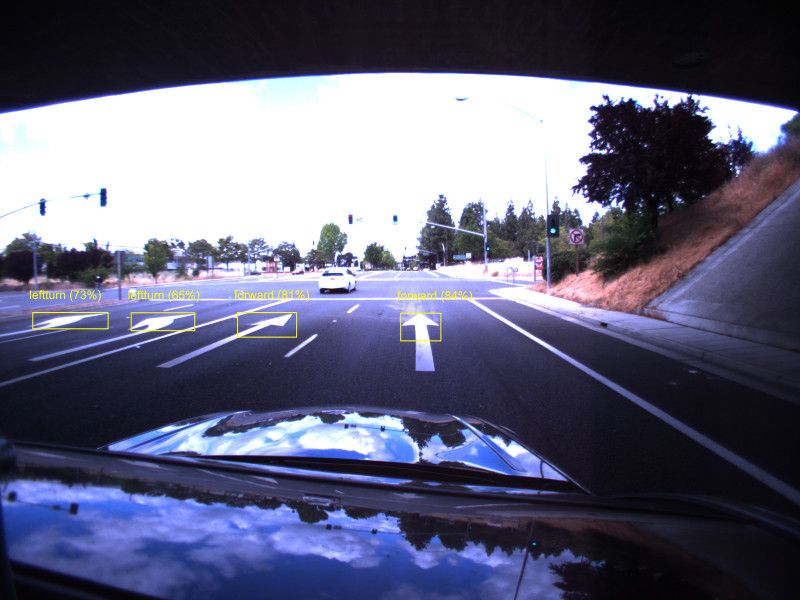